In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

# Лабораторная работа №3
## Задание 5
### {Фамилия Имя}, {Номер группы}, Вариант {Номер варианта}, ({Дата})

### Данные

По данным выборки проверить с помощью критерия Пирсона при уровне значимости α гипотезу:
- о показательном;
- равномерном;
- нормальном законе распределения генеральной совокупности.

В ответе привести:
1) выбранную гипотезу о виде закона распределения;
2) вычисленное значение критерия;
3) критическое значение;
4) вывод о принятии или не принятии гипотезы.


In [29]:
src_data = pd.Series([15.6, 29.1, -5.3, 8.8, 8.7, 2.5, 10.3, 14.4, 21.5, 9.9, 33.5, 15.9, 8.0, 21.4, 9.9, 1.7, 11.2, 9.0, 4.5, 26.2, 3.2, 11.0, 18.3, 5.7, 21.4, 14.4, 17.5, -1.4, 0.3, 17.5, 8.8, 16.0, 0.7, 4.2, 12.2, 14.6, 16.8, 15.2, 17.0, 17.2, -1.7, 24.0, 23.6, 33.2, 21.4, 10.4, 1.5, 8.1, 12.2, 8.2, 17.6, 9.5, 22.9, 9.0, 30.0, 18.2, -10.0, -4.6, 21.4, 20.1, 18.4, 24.3, 7.5, 12.5, 7.7, 0.2, -11.0, 24.2, 24.8, 6.0, 6.6, 15.9, 15.5, 18.6, 4.3, 21.4, 8.0, 13.9, 3.9, 25.2, 16.8, 14.2, 11.8, 16.4, 14.2, 2.9, -2.3, 14.8, 19.7, -1.3, 6.0, 14.7, 9.5, 2.8, 25.0, -0.4, 9.9, 16.3, 4.8, 16.0])
n = len(src_data)
alpha = 0.025

src_data

0     15.6
1     29.1
2     -5.3
3      8.8
4      8.7
      ... 
95    -0.4
96     9.9
97    16.3
98     4.8
99    16.0
Length: 100, dtype: float64

In [30]:
Markdown(f'$n = {n}$, $\\alpha = {alpha}$')

$n = 100$, $\alpha = 0.025$

## Шаг 1: Построение интервального ряда

In [31]:
m = int(np.ceil(np.log2(n) + 1))
m

8

In [34]:
bins = src_data.value_counts(bins=m).sort_index()
data = pd.DataFrame()
data['x_i'] = list(map(lambda x: x.left, bins.index))
data['x_(i+1)'] = list(map(lambda x: x.right, bins.index))
data['f'] = bins.values
data

,x_i,x_(i+1),f
0,-11.045,-5.438,2
1,-5.438,0.125,7
2,0.125,5.688,14
3,5.688,11.250,24
4,11.250,16.812,23
5,16.812,22.375,17
6,22.375,27.938,9
7,27.938,33.500,4


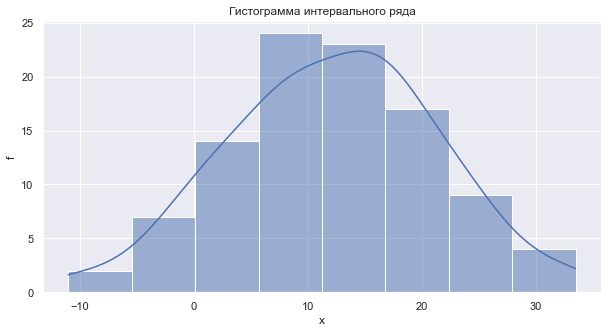

In [94]:
def hist(data):
    sns.set_theme()
    fig, ax = plt.subplots(figsize=(10, 5))
    ax = sns.histplot(data, bins=m, kde=True, ax=ax)
    ax.set_xlabel("x")
    ax.set_ylabel("f")
    ax.set_title("Гистограмма интервального ряда")
    plt.plot()

hist(src_data)

## Шаг 2: Проверка гипотезы о показательном распределение

In [35]:
dist = "показательным"
Markdown(f"""
- $H_0$: закон распределения генеральной совокупности является {dist}.
- $H_1$: закон распределения генеральной совокупности не является {dist}.
""")


- $H_0$: закон распределения генеральной совокупности является показательным.
- $H_1$: закон распределения генеральной совокупности не является показательным.


### Вычисление среднего значения

$$\overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

In [36]:
def mean_interval_row(xi, xj, f):
    x_mean = (xi + xj) / 2
    return (x_mean * f).sum() / f.sum()

mean = mean_interval_row(data["x_i"], data["x_(i+1)"], data["f"])
mean

12.139555

Для проверки гипотезы о показательном распределения воспользуемся критерием согласия хи-квадрат. Нужно вычислить теоретические (ожидаемые) частоты попадания значений в каждый интервал, если бы распределение было равномерным. Для этого воспользуемся формулой:
$$P_i=P(x_i < X < x_{i+1})=e^{-\lambda x_i} - e^{-\lambda x_{i+1}}$$
$$f' = fP_i$$
$$\lambda = 1/\bar{x}$$

In [37]:
lmbda = 1 / mean
lmbda

0.08237534242400155

In [41]:
p = st.expon.cdf(data["x_(i+1)"], scale=1/lmbda) - st.expon.cdf(data["x_i"], scale=1/lmbda)
p, p.sum()

(array([0.        , 0.01024409, 0.36384733, 0.23005964, 0.14549867,
        0.09203206, 0.05819986, 0.03679961]),
 0.9366812617799309)

In [40]:
data["f'"] = p * data["f"].sum()
data["f'"]

0     0.000000
1     1.024409
2    36.384733
3    23.005964
4    14.549867
5     9.203206
6     5.819986
7     3.679961
Name: f', dtype: float64

Вычислим значение статистики критерия $\chi^2$:


$$\chi^2 = \sum_{i=1}^{k} \frac{(f_i - f_i^*)^2}{f_i^*} = \frac{(\text{наблюдаемая частота} - \text{ожидаемая частота})^2}{\text{ожидаемая частота}}$$

In [42]:
chi2_value_expon = ((data["f"] - data["f'"])**2 / data["f'"]).sum()
chi2_value_expon

inf

#### Степени свободы:

In [43]:
df = (data["f"] >= 5).sum() - 2
df

4

#### Критическое значение

In [44]:
chi2_critical_expon = st.chi2.ppf(1-alpha, df=df)
chi2_critical_expon

11.143286781877796

In [46]:
display(Markdown(f"Так как вычисленное значение статистики критерия Пирсона ($\chi^2 = {chi2_value_expon}$) превышает критическое значение ($\chi^2 = {chi2_critical_expon}$), то мы отвергаем нулевую гипотезу $H_0$ и приниамаем альтернативную гипотезу $H_1$. Это означает, что закон распределения генеральной совокупности не является {dist}."))

Так как вычисленное значение статистики критерия Пирсона ($\chi^2 = inf$) превышает критическое значение ($\chi^2 = 11.143286781877796$), то мы отвергаем нулевую гипотезу $H_0$ и приниамаем альтернативную гипотезу $H_1$. Это означает, что закон распределения генеральной совокупности не является показательным.

## Шаг 3: Проверка гипотезы о равномерном распределение

In [47]:
dist = "равномерным"
Markdown(f"""
- $H_0$: закон распределения генеральной совокупности является {dist}.
- $H_1$: закон распределения генеральной совокупности не является {dist}.
""")


- $H_0$: закон распределения генеральной совокупности является равномерным.
- $H_1$: закон распределения генеральной совокупности не является равномерным.


### Вычисление дисперсии

$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \overline{x})^2$$

In [49]:
def var_interval_row(xi, xj, f):
    x_mean = (xi + xj) / 2
    mean_square = ((x_mean ** 2) * f).sum() / f.sum()
    mean = mean_interval_row(xi, xj, f)
    return mean_square - mean ** 2

variance = var_interval_row(data["x_i"], data["x_(i+1)"], data["f"])
variance

78.126559814475

### Вычисление стандартного отклонения

$$s = \sqrt{s^2}$$

In [50]:
std = np.sqrt(variance)
std

8.838923000822838

Для проверки гипотезы о равномерном распределения воспользуемся критерием согласия хи-квадрат. Нужно вычислить теоретические (ожидаемые) частоты попадания значений в каждый интервал, если бы распределение было равнромерным. Для этого воспользуемся формулой:
$$P_i=P(x_i < X < x_{i+1})=\frac{1}{b^{*} - a^{*}}$$
$$\text{при} \space a^{*} \leq x_j \leq b^{*} $$
$$f' = fP_i$$
$$a^{*} = \bar{x} - \sqrt{3} \cdot S$$
$$b^{*} = \bar{x} + \sqrt{3} \cdot S$$

In [51]:
a = mean - np.sqrt(3) * std
b = mean + np.sqrt(3) * std
a, b

(-3.16990872161432, 27.44901872161432)

In [52]:
p = st.uniform.cdf(data["x_(i+1)"], loc=a, scale=b-a) - st.uniform.cdf(data["x_i"], loc=a, scale=b-a)

assert np.isclose(p.sum(), 1, rtol=.01), "Сумма теоретических оснований должна быть равна 1."
p

array([0.        , 0.10761019, 0.18168501, 0.18165235, 0.18165235,
       0.18168501, 0.1657151 , 0.        ])

In [53]:
data["f'"] = p * data["f"].sum()
data["f'"]

0     0.000000
1    10.761019
2    18.168501
3    18.165235
4    18.165235
5    18.168501
6    16.571510
7     0.000000
Name: f', dtype: float64

Вычислим значение статистики критерия $\chi^2$:


$$\chi^2 = \sum_{i=1}^{k} \frac{(f_i - f_i^*)^2}{f_i^*} = \frac{(\text{наблюдаемая частота} - \text{ожидаемая частота})^2}{\text{ожидаемая частота}}$$

In [56]:
((data["f"] - data["f'"])**2 / data["f'"])

0         inf
1    1.314491
2    0.956402
3    1.874156
4    1.286796
5    0.075152
6    3.459417
7         inf
dtype: float64

In [54]:
chi2_value_uniform = ((data["f"] - data["f'"])**2 / data["f'"]).sum()
chi2_value_uniform

inf

#### Степени свободы:

In [57]:
df = (data["f"] >= 5).sum() - 3
df

3

#### Критическое значение

In [67]:
chi2_critical_uniform = st.chi2.ppf(1-alpha, df=df)
chi2_critical_uniform

9.348403604496148

In [68]:
display(Markdown(f"Так как вычисленное значение статистики критерия Пирсона ($\chi^2 = {chi2_value_uniform}$) превышает критическое значение ($\chi^2 = {chi2_critical_uniform}$), то мы отвергаем нулевую гипотезу $H_0$ и приниамаем альтернативную гипотезу $H_1$. Это означает, что закон распределения генеральной совокупности не является {dist}."))

Так как вычисленное значение статистики критерия Пирсона ($\chi^2 = inf$) превышает критическое значение ($\chi^2 = 9.348403604496148$), то мы отвергаем нулевую гипотезу $H_0$ и приниамаем альтернативную гипотезу $H_1$. Это означает, что закон распределения генеральной совокупности не является нормальным.

## Шаг 4: Проверка гипотезы о нормальном распределение

In [60]:
dist = "нормальным"
Markdown(f"""
- $H_0$: закон распределения генеральной совокупности является {dist}.
- $H_1$: закон распределения генеральной совокупности не является {dist}.
""")


- $H_0$: закон распределения генеральной совокупности является нормальным.
- $H_1$: закон распределения генеральной совокупности не является нормальным.


Для проверки гипотезы о нормальности распределения воспользуемся критерием согласия хи-квадрат. Нужно вычислить теоретические (ожидаемые) частоты попадания значений в каждый интервал, если бы распределение было нормальным. Для этого воспользуемся формулой:
$$P_i=P(x_i < X < x_{i+1})=Ф(\frac{x_{i+1} - \bar{x}}{S}) - Ф(\frac{x_{i} - \bar{x}}{S})$$
$$f' = fP_i$$

In [62]:
p = st.norm.cdf((data["x_(i+1)"] - mean) / std) - st.norm.cdf((data["x_i"] - mean) / std)

data["f'"] = p * data["f"].sum()
data["f'"]

0     1.901186
1     6.365950
2    14.569556
3    22.719307
4    24.154813
5    17.510135
6     8.649398
7     2.910631
Name: f', dtype: float64

Вычислим значение статистики критерия $\chi^2$:


$$\chi^2 = \sum_{i=1}^{k} \frac{(f_i - f_i^*)^2}{f_i^*} = \frac{(\text{наблюдаемая частота} - \text{ожидаемая частота})^2}{\text{ожидаемая частота}}$$

In [69]:
chi2_value_norm = ((data["f"] - data["f'"])**2 / data["f'"]).sum()
chi2_value_norm

0.6547506282482705

#### Степени свободы:

In [65]:
df = (data["f"] >= 5).sum() - 3
df

3

#### Критическое значение

In [70]:
chi2_critical_norm = st.chi2.ppf(1-alpha, df=df)
chi2_critical_norm

9.348403604496148

In [71]:
display(Markdown(f"Так как вычисленное значение статистики критерия Пирсона ($\chi^2 = {chi2_value_norm}$) превышает критическое значение ($\chi^2 = {chi2_critical_norm}$), то мы принимаем нулевую гипотезу $H_0$ и отвергаем альтернативную гипотезу $H_1$. Это означает, что закон распределения генеральной совокупности является {dist}."))

Так как вычисленное значение статистики критерия Пирсона ($\chi^2 = 0.6547506282482705$) превышает критическое значение ($\chi^2 = 9.348403604496148$), то мы принимаем нулевую гипотезу $H_0$ и отвергаем альтернативную гипотезу $H_1$. Это означает, что закон распределения генеральной совокупности не является нормальным.

## Шаг 5: Вывод

In [76]:
display(Markdown("## Вывод"))
display(Markdown(f"Таблица распределения хи-квадрат ($\chi^2$) со степенями свободы {df} и уровнем значимости {alpha} даёт критическое значение $\chi^2 = {chi2_critical_norm}$."))
display(Markdown(f"Так как вычисленное значение статистики критерия Пирсона ($\chi^2 = {chi2_value_norm}$) превышает критическое значение ($\chi^2 = {chi2_critical_norm}$), то мы принимаем нулевую гипотезу $H_0$ и отвергаем альтернативную гипотезу $H_1$. Это означает, что закон распределения генеральной совокупности является {dist}."))

## Вывод

Таблица распределения хи-квадрат ($\chi^2$) со степенями свободы 3 и уровнем значимости 0.025 даёт критическое значение $\chi^2 = 9.348403604496148$.

Так как вычисленное значение статистики критерия Пирсона ($\chi^2 = 0.6547506282482705$) превышает критическое значение ($\chi^2 = 9.348403604496148$), то мы принимаем нулевую гипотезу $H_0$ и отвергаем альтернативную гипотезу $H_1$. Это означает, что закон распределения генеральной совокупности является нормальным.